# 0. 환경설정

관리자 권한으로 아나콘다 prompt 실행 후  
conda install -c anaconda py-xgboost   
입력 하여 설치

In [1]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 폰트 오류 해결
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
# 행 개수 조정
pd.set_option('display.max_row', 200)

# 열 개수 조정
pd.set_option('display.max_columns', 200)

# 데이터 불러오기

### 1. 믹스견

In [4]:
df_breed_mix = pd.read_csv("./data/M_data_breed_mix.csv")
df_breed_mix

,age,weight,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,0,0,0,1,0,0,1,1,0,0,0
1,6,12.00,0,0,1,0,0,1,0,0,1,0,0
2,3,4.65,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,1,0,0,0,0,0,1,1,0,0,0
4,1,5.80,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,1,1.00,0,0,0,1,0,0,1,1,0,0,0
3607,1,1.00,0,0,0,1,0,0,1,1,0,0,0
3608,1,1.00,0,0,0,1,0,0,1,1,0,0,0
3609,1,1.00,0,0,0,1,0,0,1,1,0,0,0


## 2. 믹스견 + 보호소

In [5]:
df_breed_mix_shelter = pd.read_csv("./data/M_data_breed_mix_shelter.csv")
df_breed_mix_shelter

,age,weight,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status,shelter_name_24시아이동물메디컬,shelter_name_cj동물병원,shelter_name_가나동물병원,shelter_name_가야동물병원,shelter_name_가평군유기동물보호소,shelter_name_고양시동물보호센터,shelter_name_광주TNR동물병원초월,shelter_name_군포시청,shelter_name_금릉동물병원,shelter_name_나은동물병원,shelter_name_남양유기견보호센터,shelter_name_남양주동물보호협회,shelter_name_로뎀동물병원,shelter_name_문산동물병원,shelter_name_미엘동물병원,shelter_name_버디종합동물병원,shelter_name_부천시수의사회,shelter_name_수원시 동물보호센터,shelter_name_양평군유기동물보호소,shelter_name_오산시수의사회,shelter_name_용인시 동물보호센터,shelter_name_웰니스클리닉,shelter_name_위더스 동물보호센터,shelter_name_의왕시청,shelter_name_이성준동물병원,shelter_name_파주24시동물병원,shelter_name_파주독 애견호텔,shelter_name_펫토피아동물병원,shelter_name_평택시유기동물보호소,shelter_name_하남동물병원,shelter_name_한국동물구조관리협회,shelter_name_한국야생동물보호협회,shelter_name_행복한동물병원
0,1,4.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,6,12.00,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,4.65,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4.50,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,5.80,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,1,1.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3607,1,1.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3608,1,1.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3609,1,1.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. top5 품종

In [6]:
df_breed_top5 = pd.read_csv("./data/M_data_breed_top5.csv")
df_breed_top5

,age,weight,color_black,color_brown,color_mix,color_white,color_yellow,breed_라브라도 리트리버,breed_말티즈,breed_진도견,breed_포메라니안,breed_푸들,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,9,3.70,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,4,6.00,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,4,4.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1
3,3,9.00,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,8,3.24,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2,3.50,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1
383,3,2.20,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
384,3,18.00,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
385,4,20.00,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1


## 4. top5 품종 + 보호소

In [7]:
df_breed_top5_shelter = pd.read_csv("./data/M_data_breed_top5_shelter.csv")
df_breed_top5_shelter

,age,weight,color_black,color_brown,color_mix,color_white,color_yellow,breed_라브라도 리트리버,breed_말티즈,breed_진도견,breed_포메라니안,breed_푸들,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status,shelter_name_24시아이동물메디컬,shelter_name_cj동물병원,shelter_name_가나동물병원,shelter_name_가야동물병원,shelter_name_가온동물병원,shelter_name_가평군유기동물보호소,shelter_name_고양시동물보호센터,shelter_name_광주TNR동물병원초월,shelter_name_나은동물병원,shelter_name_남양유기견보호센터,shelter_name_남양주동물보호협회,shelter_name_로뎀동물병원,shelter_name_미엘동물병원,shelter_name_버디종합동물병원,shelter_name_수원시 동물보호센터,shelter_name_양평군유기동물보호소,shelter_name_오산시수의사회,shelter_name_용인시 동물보호센터,shelter_name_웰니스클리닉,shelter_name_위더스 동물보호센터,shelter_name_이성준동물병원,shelter_name_파주24시동물병원,shelter_name_파주독 애견호텔,shelter_name_펫토피아동물병원,shelter_name_평택시유기동물보호소,shelter_name_하남동물병원,shelter_name_한국동물구조관리협회,shelter_name_한국야생동물보호협회,shelter_name_행복한동물병원
0,9,3.70,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4,6.00,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,4.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,9.00,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8,3.24,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2,3.50,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
383,3,2.20,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
384,3,18.00,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385,4,20.00,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# 데이터 분할

## 1. 믹스견

### 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split

df_breed_mix_data = df_breed_mix.drop("status", axis = 1)
df_breed_mix_target = df_breed_mix[["status"]]

x_train, x_test, y_train, y_test = train_test_split(df_breed_mix_data, 
                                                    df_breed_mix_target,
                                                    test_size = 0.1, random_state = 151)

print(x_train.shape, x_test.shape)

(3249, 12) (362, 12)


## 2. 믹스견 + 보호소

### 데이터 분할

In [16]:
from sklearn.model_selection import train_test_split

df_breed_mix_shelter_data = df_breed_mix_shelter.drop("status", axis = 1)
df_breed_mix_shelter_target = df_breed_mix_shelter[["status"]]

x_train, x_test, y_train, y_test = train_test_split(df_breed_mix_shelter_data, 
                                                    df_breed_mix_shelter_target,
                                                    test_size = 0.1, random_state = 151)

print(x_train.shape, x_test.shape)

(3249, 45) (362, 45)


## 3. top5 품종

### 데이터 분할

In [21]:
from sklearn.model_selection import train_test_split

df_breed_top5_data = df_breed_top5.drop("status", axis = 1)
df_breed_top5_target = df_breed_top5[["status"]]

x_train, x_test, y_train, y_test = train_test_split(df_breed_top5_data, 
                                                    df_breed_top5_target,
                                                    test_size = 0.1, random_state = 151)

print(x_train.shape, x_test.shape)

(348, 17) (39, 17)


## 4. top5 품종 + 보호소

### 데이터 분할

In [26]:
from sklearn.model_selection import train_test_split

df_breed_top5_shelter_data = df_breed_top5_shelter.drop("status", axis = 1)
df_breed_top5_shelter_target = df_breed_top5_shelter[["status"]]

x_train, x_test, y_train, y_test = train_test_split(df_breed_top5_shelter_data,
                                                    df_breed_top5_shelter_target,
                                                    test_size = 0.1, random_state = 151)

print(x_train.shape, x_test.shape)

(348, 46) (39, 46)


# 평가 함수 만들기

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, auc
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [9]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
        
    sns.set_theme(style = 'white')
    plt.figure(figsize = (6, 6))
    
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, color = '#b01717', label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', color = '#174ab0', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.grid(True)
    plt.legend()


# XGBOOST

In [10]:
import xgboost as xgb
from xgboost import plot_importance
print(xgb.__version__)

1.3.3


## 1. 믹스견

### 모델링

In [12]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "error")
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

### 평가

In [13]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[207  33]
 [ 72  50]]
정확도: 0.7099, 정밀도: 0.6024, 재현율: 0.4098, F1: 0.4878, AUC:0.6362


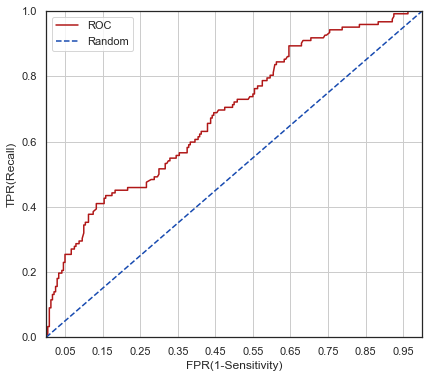

In [14]:
roc_curve_plot(y_test, w_pred_proba)

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

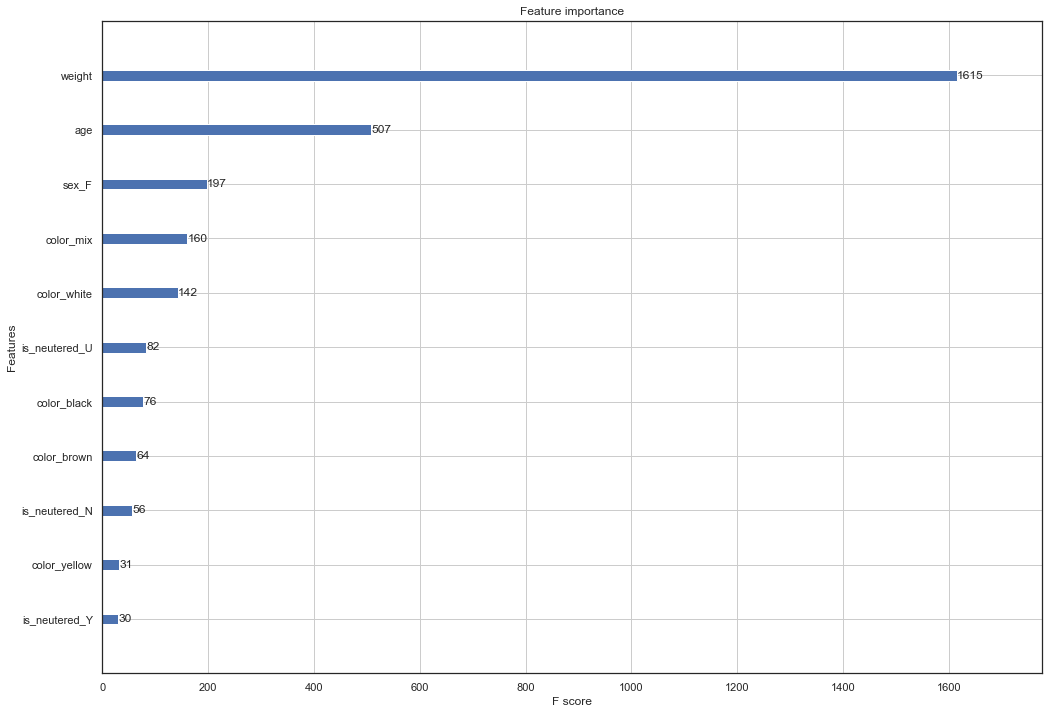

In [15]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb_wrapper, ax = ax)

## 2. 믹스견 + 보호소

### 모델링

In [17]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "logloss")
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

### 평가

In [18]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[217  23]
 [ 64  58]]
정확도: 0.7597, 정밀도: 0.7160, 재현율: 0.4754, F1: 0.5714, AUC:0.6898


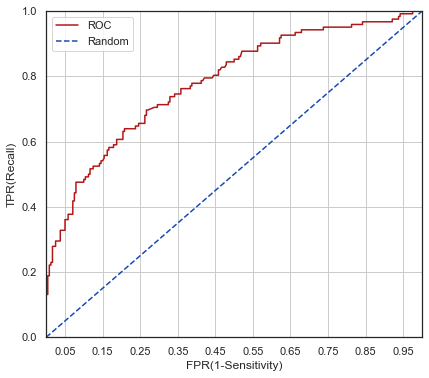

In [19]:
roc_curve_plot(y_test, w_pred_proba)

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

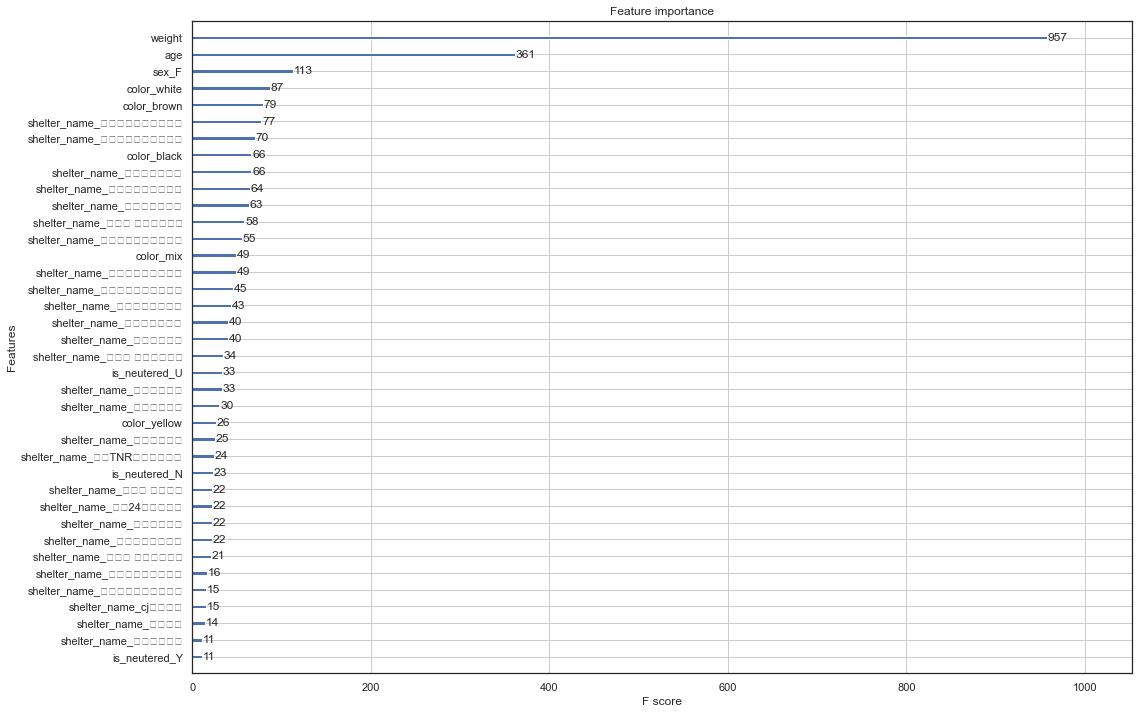

In [20]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb_wrapper, ax = ax)

## 3. top5 품종

### 모델링

In [22]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "logloss")
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

### 평가

In [23]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[ 4  1]
 [ 9 25]]
정확도: 0.7436, 정밀도: 0.9615, 재현율: 0.7353, F1: 0.8333, AUC:0.7676


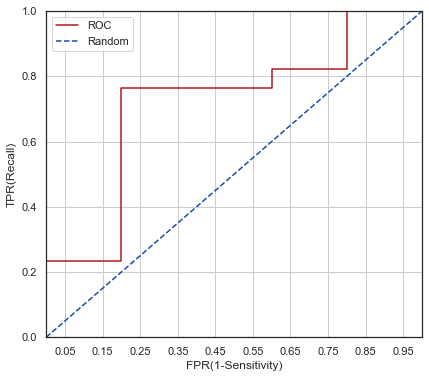

In [24]:
roc_curve_plot(y_test, w_pred_proba)

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

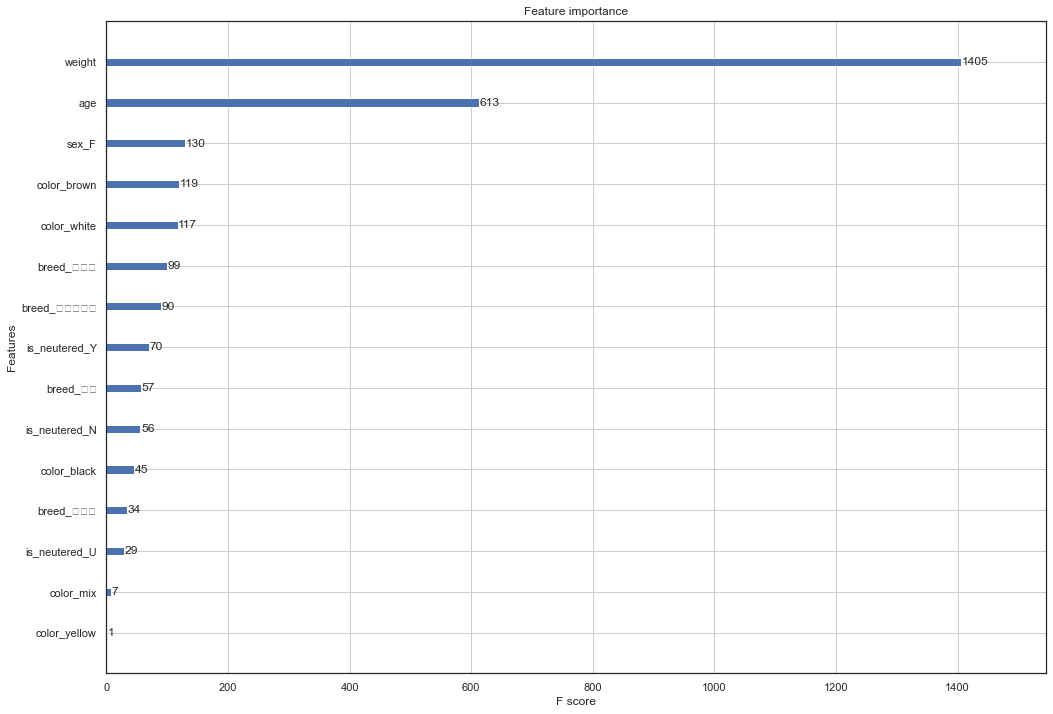

In [25]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb_wrapper, ax = ax)

## 4. top5 품종 + 보호소

### 모델링

In [27]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "logloss")
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:,1]

### 평가

In [28]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[ 3  2]
 [ 9 25]]
정확도: 0.7179, 정밀도: 0.9259, 재현율: 0.7353, F1: 0.8197, AUC:0.6676


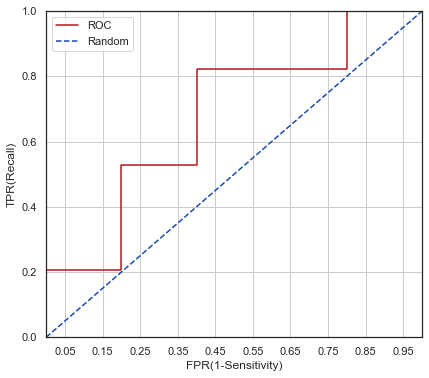

In [29]:
roc_curve_plot(y_test, w_pred_proba)

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

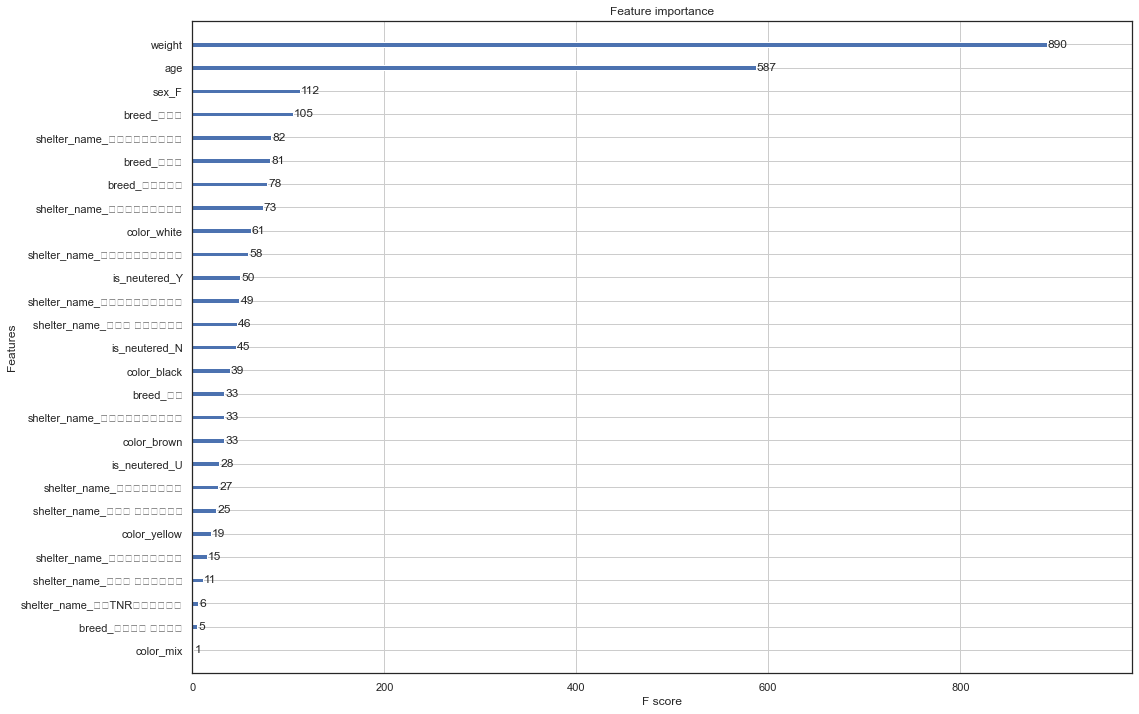

In [30]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb_wrapper, ax = ax)